## Step 1: find a pretty photo of the earth.

And the use the Python Image Library to load it in.

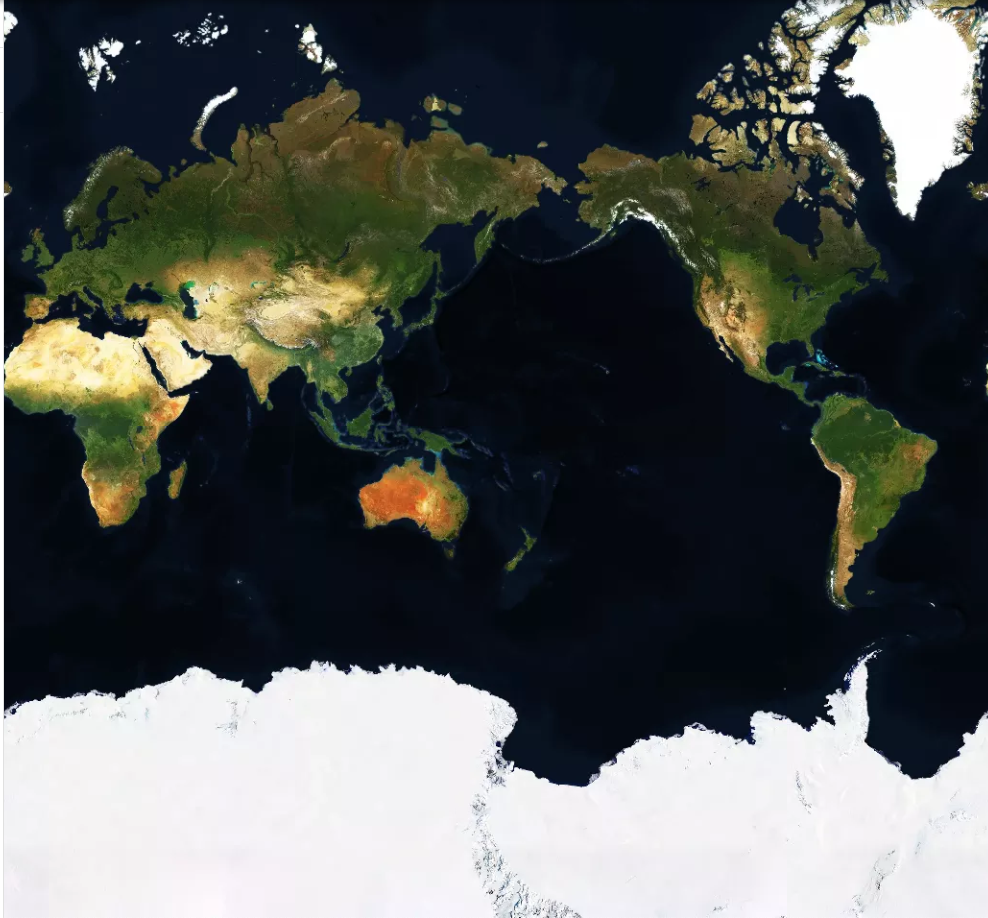

In [2]:
from PIL import Image  

im = Image.open(r"data/earth.png")  
im

## Step 2: pre-process the data

To apply basic image processing methods such as those in the popular python library scikit-learn, we first need to convert the image into a Numpy array.

In [3]:
import numpy as np

image_as_array = np.array(im)
width, height, d = image_as_array.shape
width, height, d

(918, 988, 4)

Since my hypothesis was about clustering the pixels, we can just reshape the array into what's essentially a list of pixels.

In [27]:
pixels = image_as_array.reshape((width*height, d))/255


The pixels are in a RBG format, where R, G and B values run from 0 to 1.

In [29]:
pixels[0]

array([0.77647059, 0.77647059, 0.77647059, 1.        ])

## Step 3: Cluster the data


So now we've prepared the data, we can start using the fun algorithms from scikit-learn module (Sklearn)

In [5]:
from sklearn.cluster import KMeans


In [6]:
%%timeit
pixels_as_float = pixels.astype('float64') # k-means needs float or double

n_clusters = 10

centroids = KMeans(n_clusters=n_clusters).fit_predict(pixels_as_float)

8.39 s ± 681 ms per loop (mean ± std. dev. of 7 runs, 1 loop each)


In [7]:
n_clusters = 10
pixels_as_float = pixels.astype('float64') # k-means needs float or double
centroids = KMeans(n_clusters=n_clusters).fit_predict(pixels_as_float)

The great thing about the Sklearn is that each category of algorithm has a very consistent API which makes it straight-forward to try algorithms with similar objectives. E.g we could apply the OPTICS algorithm quite easily.

However I was running up against performance issues with both OPTICS and DBSCAN. This is the point where I pivoted which is about where I decided that I was trying to fine tune a solution with better algorithms, when a better UX would be far more beneficial.

In [8]:
from sklearn.cluster import OPTICS

# this takes a long time to run - commenting out to avoid auto-running it
#centroids = OPTICS().fit_predict(pixels_as_float) # OPTICS determines the number of clusters itself, unlike K-Means

## Step 4: Look at the output


In [9]:
colors = []
frequencies = []

for i in range(n_clusters):
    colors.append((
        np.mean(pixels[(centroids == i)][:,0]), 
        np.mean(pixels[(centroids == i)][:,1]),
        np.mean(pixels[(centroids == i)][:,2])
    ))
    frequencies.append(len(pixels[(centroids == i)])/(width*height))

In [13]:
from matplotlib.colors import to_hex

colors_hex = [to_hex(c) for c in colors]

In [14]:
from pywaffle import Waffle

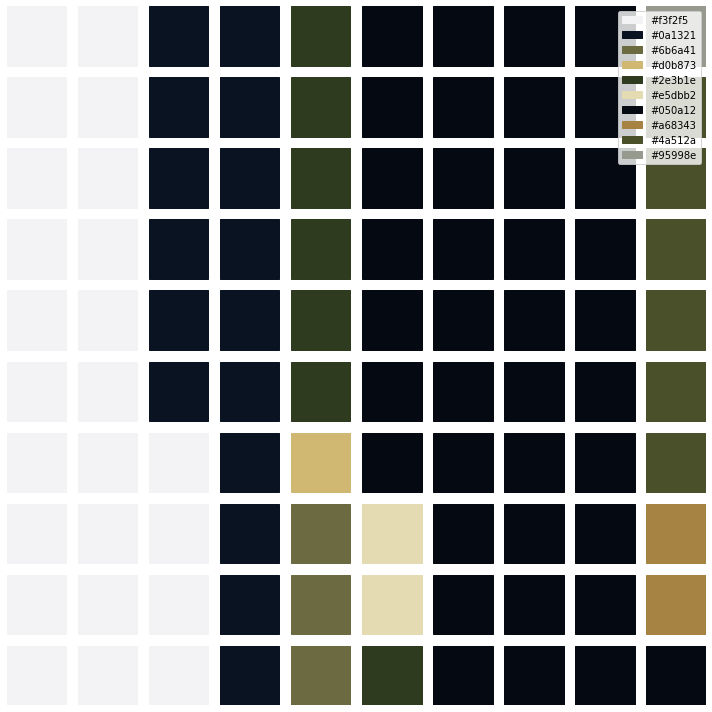

In [26]:
import matplotlib.pyplot as plt

# Waffle deals with integers and square numbers - munging a bit here to create 100 squares
values = dict(zip(colors_hex, [np.round(f*99.125) for f in frequencies])) 
fig = plt.figure(
    FigureClass=Waffle, 
    rows=10, 
    values=values, 
    colors=colors_hex,
    figsize=(10,10)
)
plt.show()

## Step 5: Iteraterate

Based on what you see here, go back to Step 3 and consider using a different set of parameters for clustering. See the documentation to learn more about all the different ways you can cluster data: https://scikit-learn.org/stable/modules/clustering.html#